In [1]:
print('Bike Sharing Assigenment- Anurag Agarwal DS45')

Bike Sharing Assigenment- Anurag Agarwal DS45


#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


#### Business Goal:
- You are required to model the demand for shared bikes with the available independent variables. 
- It will be used by the management to understand how exactly the demands vary with different features. 
- They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. 
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [2]:
### Importing libraries

In [3]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import statsmodels

import sklearn

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import MinMaxScaler

### Data Redaing & Undersatandiung

In [4]:
## importing data set for Bike sharing as bs

bs = pd.read_csv("day.csv")

bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bs.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [6]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


No null values

In [7]:
# percentage of missing values in each column
round(100*(bs.isnull().sum()/len(bs)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
bs.shape

(730, 16)

data have 730 rows and 16 variables/features

In [9]:
bs.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [10]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
bs.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


#### Insights:

- Data has no Null values
- Data contains 730 rows and 16 Variables/Features
- Data have 4 non order continoues variables
- 7 numerical continuoes variable
- 4 categorical variables

-

### Data Cleaning/ Imputing and Visulization

#### Droping the variables

Upon studying the data dictionary, the following variables were found to be either redundant or unwanted

instant- as it represants only number of rows hence not use ful for our model

dteday- as it represents date and we have binary data available for year 2018 as 0 and 2019 as 1, same for months.

Casual & registered - as we can see CNT is our target variable and CNT = sum(casual+registered)

In [13]:

bs1 = bs.drop(columns=['instant','dteday','casual','registered'])

In [14]:
bs1.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349


In [15]:
### categrozing the variables

## contninoues Numerical

num = ['temp','atemp', 'hum', 'windspeed', 'cnt']

## binary variables/ categorical

cat = ['season','yr', 'mnth', 'holiday', 'weekday', 'workingday','weathersit' ]

### cleaning Data

We have to conver Non order categorical columns by giving proper name 

Variables need to be clean - Season, Mnth, Weekday, weathersit

In [16]:
# Converting non order variales datatype to 'category'

bs1[['season','weathersit','mnth', 'weekday']] = bs1[['season','weathersit','mnth','weekday']].astype('category')

In [17]:
bs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


### Encoding

#### Maping more appropite names to variable season, mnth, weekday, weathersit

In [18]:
#### Maping more appropite names to variable season, mnth, weekday, weathersit

bs1.season = bs1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
                          
bs1.mnth = bs1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
                          
bs1.weekday = bs1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri', 6:'sat'}) 

bs1.weathersit = bs1.weathersit.map({1:'clear',2:'misty',3:'lightsnow_rain',4:'heavyrain_fog'})

In [19]:
bs1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
bs1.shape

(730, 12)

#### Insights

- droped 4 variables 'instant','dteday','casual','registered'
- maped appropiate and significaant name to Non- order categotical variables
- variable has been converted to desired data type

### Data Visualization

- For Numerical continoues variables

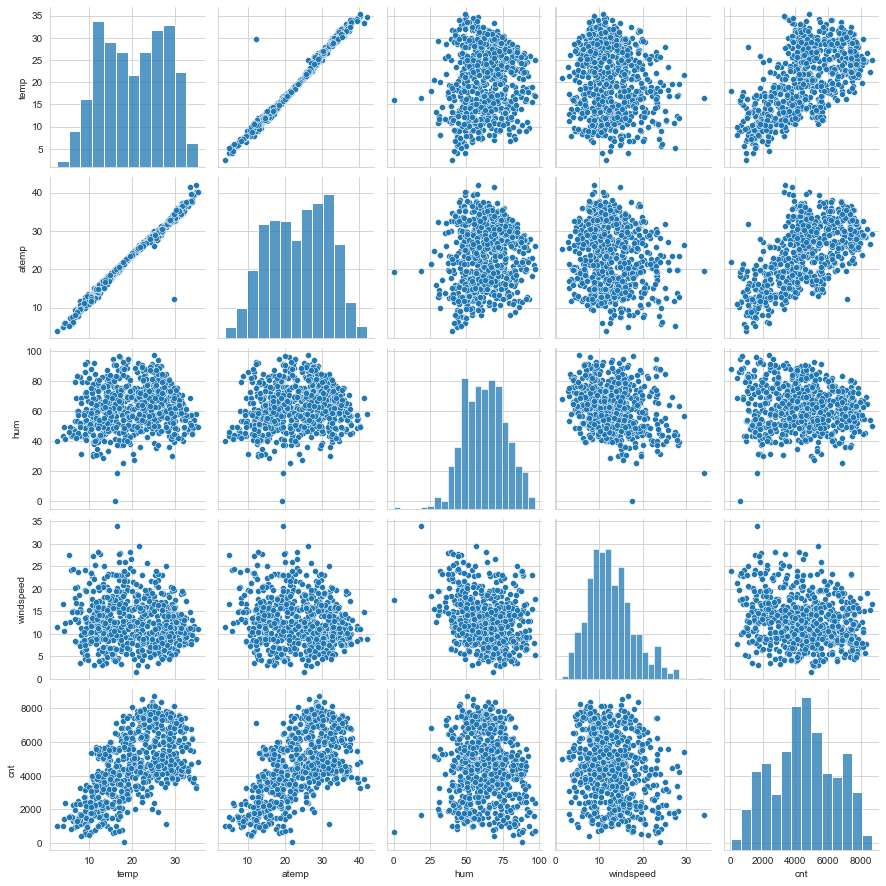

In [21]:
sns.set_style("whitegrid")
sns.pairplot(bs1[num])
plt.show()

In [22]:
bs1[['temp','atemp', 'hum', 'windspeed', 'cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [23]:
bs1[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991696
atemp,0.991696,1.000000


#### Insights

- temp & atemp have very strong correlation
- cnt is target variable 
- cnt shows positive correlation with temp 

#### as we can see there is a very strong co relation bw temp and atemp 0.991 i.e almost = 1
- we will drop one to keep them from the data
- to keep our model sanity as assumptions in chekc
- they are also providing the same information
- to avoid multicollinearity bw data
- temp is factual while atemp is felt by end user(which may vary form person to person)
- hence will drop atemp from our data

In [24]:
#### droping atemp from data

bs1 = bs1.drop(columns=['atemp'])

In [25]:
bs1.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349


In [26]:
### re-checking the corr bw numercial variables after droping atemp

bs1[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.128565,-0.158186
hum,0.128565,1.000000,-0.248506
windspeed,-0.158186,-0.248506,1.000000


#### categorical variable visualization

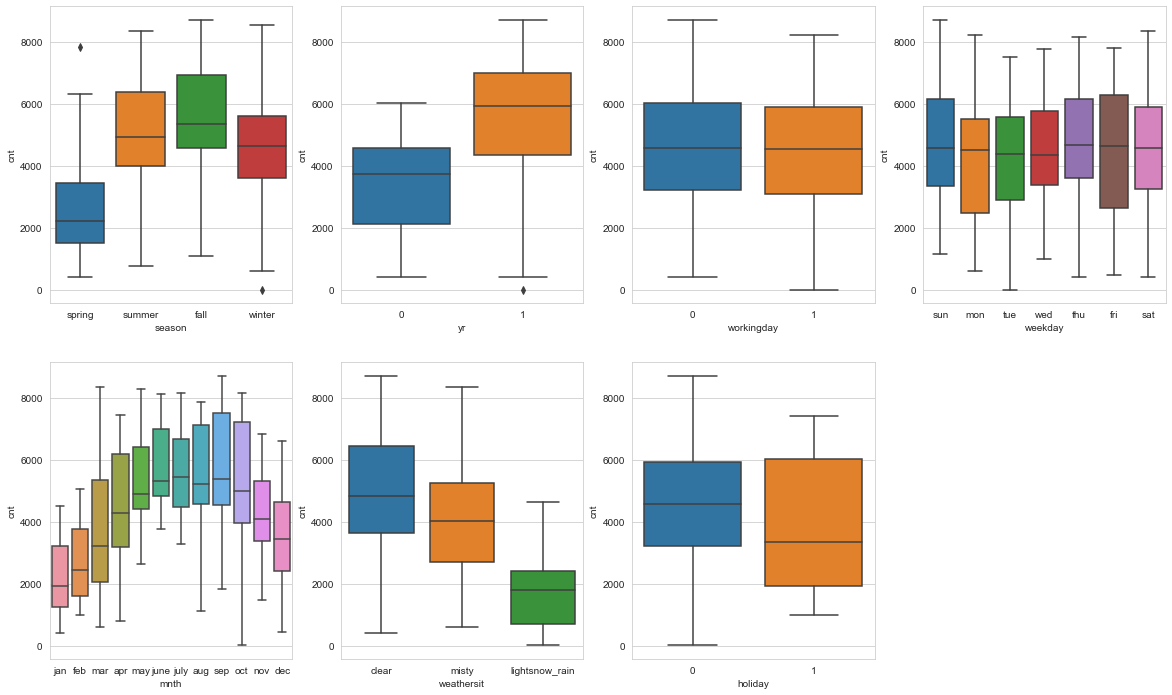

In [27]:
#### categorical variable visualization


plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bs1)

plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bs1)

plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bs1)


plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bs1)

plt.subplot(2,4,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = bs1)

plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bs1)

plt.subplot(2,4,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bs1)

plt.show()

#### Insights


- number of cnt increased during season fall follwed by summer
- cnt has been increased in yr 2019
- cnt have almost same median as working day or holiday. 
- median for working day is almost same, a dip during wednesday is seen
- highest demand increase during month sep and least during Jan in winters
- clear skies are more favourable as cnt is high and median too
- while during snow/rain cnt are very low & median is almost half
- cnt are high for working day rather then holiday

### Data preparation

#### Dummy variables

- We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'. 

In [28]:
bs1.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349


#### creating dummy variables

In [29]:
## creating dummy variables and dropping original


bs1 = pd.get_dummies(data=bs1,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [30]:
bs1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
#### checking shape after dummy variables

bs1.shape

(730, 29)

In [32]:
bs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   hum                        730 non-null    float64
 5   windspeed                  730 non-null    float64
 6   cnt                        730 non-null    int64  
 7   season_summer              730 non-null    uint8  
 8   season_fall                730 non-null    uint8  
 9   season_winter              730 non-null    uint8  
 10  mnth_feb                   730 non-null    uint8  
 11  mnth_mar                   730 non-null    uint8  
 12  mnth_apr                   730 non-null    uint8  
 13  mnth_may                   730 non-null    uint8  

#### Insights
- dummy variable has been created
- datatype has been checked and changed
- new shape for data is 730 rows and 29 variables

### Splitting the data set into Test & Train subsets

In [33]:
import sklearn 
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(bs1, train_size=0.7, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


- df_train.shape (510, 29)
- df_test.shape (220, 29)

### Scaling the numerical variables

- using MinMaxScaler

In [35]:
# Apply scaler() to all the numeric variables

scaler= MinMaxScaler()

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [36]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,0,0,...,0,1,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [38]:
bs1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'season_fall', 'season_winter', 'mnth_feb', 'mnth_mar',
       'mnth_apr', 'mnth_may', 'mnth_june', 'mnth_july', 'mnth_aug',
       'mnth_sep', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_tue', 'weekday_wed', 'weekday_thu', 'weekday_fri',
       'weekday_sat', 'weathersit_misty', 'weathersit_lightsnow_rain'],
      dtype='object')

In [39]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.345098,0.029412
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

#### checking the correlation coefficients to see which variables are highly correlated

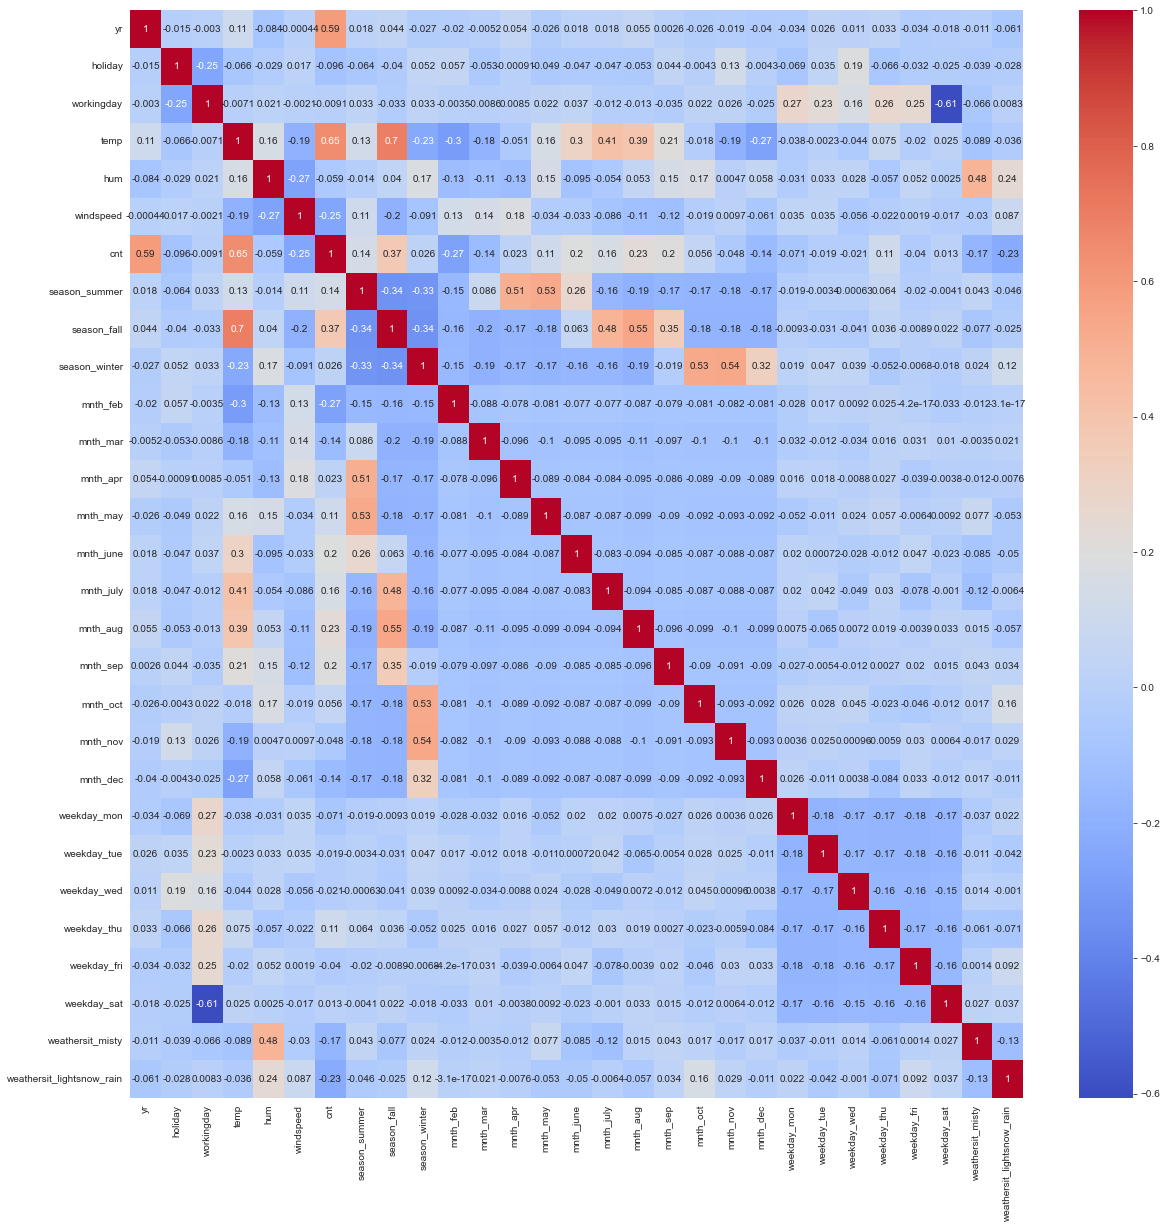

In [40]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))

sns.heatmap(df_train.corr(), annot = True, cmap="coolwarm")
plt.show()

#### As we have noticed, `cnt` seems to the correlated to `temp` the most 0.65. Let's see a pairplot for `cnt` vs `temp`. 

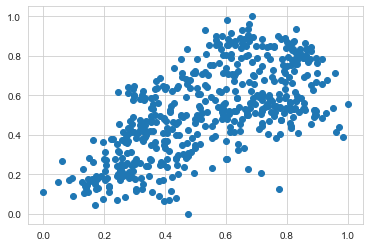

In [41]:
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Insights

- factors which increase the cnt vs which impacts negatively
- corr bw cnt & temp is 0.65 which is highest.
- corr bw cnt & mnth_feb is negative -0.27, which means cnt decrease most during feb
- working day & saturady are having correlation -0.61
- cnt havbe negative corr with weather lowrain_snow -0.23 which indicates decrease number of cnt during that weather
- cnt negatively get impact by windspeed too corr is -0.25
- Fall is favourable season to increase count and positive corr can be seen

### Dividing into X and Y sets for the model building

- while creating X and Y sets for model building will drop 'cnt' as it is our target variable

In [42]:
y_train=df_train.pop("cnt")
X_train=df_train

In [43]:
X_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_feb,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
576,1,0,1,0.815169,0.725633,0.264686,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [44]:
y_train.head(3)

576    0.827658
426    0.465255
728    0.204096
Name: cnt, dtype: float64

### Modelling

#### Approach

- A mixed approach is followed by first using RFE and then Manual Elimination
- will choose top 15 using RFE
- by using p-value method will create our models
- and will drop one variable at a time
- will recheck VIF and P value at every step and proceed furthe accordingly

### Recursive Feature Elimination RFE

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=15, step=1)
rfe = rfe.fit(X_train,y_train)

In [46]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : rfe.ranking_, 'support': rfe.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
17,1,True,mnth_oct
16,1,True,mnth_sep
15,1,True,mnth_aug
26,1,True,weathersit_misty
12,1,True,mnth_may
10,1,True,mnth_mar
8,1,True,season_winter
27,1,True,weathersit_lightsnow_rain
6,1,True,season_summer


In [47]:
# Selected Variables

selected = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected

array(['yr', 'mnth_oct', 'mnth_sep', 'mnth_aug', 'weathersit_misty',
       'mnth_may', 'mnth_mar', 'season_winter',
       'weathersit_lightsnow_rain', 'season_summer', 'windspeed', 'hum',
       'temp', 'holiday', 'season_fall'], dtype=object)

### Manual Elimination

-stepwise elimination to build model

-will drop variable one by one

In [48]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[selected]

### Model 1

In [49]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,24.63
11,hum,15.53
14,season_fall,8.80
10,windspeed,3.81
9,season_summer,3.75
7,season_winter,3.11
4,weathersit_misty,2.15
0,yr,2.05
3,mnth_aug,1.85
5,mnth_may,1.68


In [50]:
# Add a constant

import statsmodels.api as sm

X_train_lr1 = sm.add_constant(X_train_rfe)


# Create a first fitted model

lr1 = sm.OLS(y_train, X_train_lr1).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.00e-188
Time:                        15:05:23   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 2

In [51]:
# Removing the variable 'mnth_may' based on its high p-value 0.115

X_train_new = X_train_rfe.drop(["mnth_may"], axis = 1)

In [52]:
# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,24.02
10,hum,15.48
13,season_fall,8.53
9,windspeed,3.73
8,season_summer,3.53
6,season_winter,3.05
4,weathersit_misty,2.15
0,yr,2.03
3,mnth_aug,1.85
1,mnth_oct,1.63


In [53]:
# Add a constant
X_train_lr2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lr2).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.46e-189
Time:                        15:05:27   Log-Likelihood:                 512.68
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 3

In [54]:
# Removing the variable 'season_fall' based on its high p-value 0.112

X_train_new = X_train_new.drop(["season_fall"], axis = 1)

# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,14.73
11,temp,10.01
9,windspeed,3.70
6,season_winter,2.32
4,weathersit_misty,2.14
0,yr,2.02
8,season_summer,1.84
3,mnth_aug,1.61
1,mnth_oct,1.60
2,mnth_sep,1.34


In [55]:
# Add a constant
X_train_lr3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lr3).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.2
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.94e-190
Time:                        15:05:36   Log-Likelihood:                 511.38
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     496   BIC:                            -935.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 4

In [56]:
# Removing the variable 'mnth_mar' based on its high p value  0.101

X_train_new = X_train_new.drop(["mnth_mar"], axis = 1)

# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,hum,14.38
10,temp,9.88
8,windspeed,3.59
5,season_winter,2.25
4,weathersit_misty,2.13
0,yr,2.02
7,season_summer,1.84
1,mnth_oct,1.60
3,mnth_aug,1.60
2,mnth_sep,1.34


In [57]:
# Add a constant
X_train_lr4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lr4).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.49e-190
Time:                        15:05:45   Log-Likelihood:                 510.00
No. Observations:                 510   AIC:                            -994.0
Df Residuals:                     497   BIC:                            -938.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 5

In [58]:
# Removing the variable hum have high VIF 14.38 & p= values for variables are <0.05

X_train_new = X_train_new.drop(["hum"], axis = 1)

# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.11
8,windspeed,3.11
0,yr,2.00
5,season_winter,1.93
7,season_summer,1.83
1,mnth_oct,1.59
3,mnth_aug,1.59
4,weathersit_misty,1.49
2,mnth_sep,1.34
6,weathersit_lightsnow_rain,1.10


In [59]:
# Add a constant
X_train_lr5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lr5).fit()

print(lr5.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          9.45e-187
Time:                        15:05:54   Log-Likelihood:                 498.15
No. Observations:                 510   AIC:                            -972.3
Df Residuals:                     498   BIC:                            -921.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 6

In [60]:
# Removing the variable mnth_oct for high p-value 0.082

X_train_new = X_train_new.drop(["mnth_oct"], axis = 1)

# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,temp,5.01
7,windspeed,3.10
0,yr,2.00
6,season_summer,1.82
2,mnth_aug,1.58
3,weathersit_misty,1.49
4,season_winter,1.48
1,mnth_sep,1.31
5,weathersit_lightsnow_rain,1.08
9,holiday,1.04


In [61]:
# Add a constant
X_train_lr6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lr6).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.62e-187
Time:                        15:05:55   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Model 7

In [62]:
# Removing the variable mnth_aug for p-value 0.001

X_train_new = X_train_new.drop(["mnth_aug"], axis = 1)

# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,temp,3.68
6,windspeed,3.06
0,yr,2.00
5,season_summer,1.57
2,weathersit_misty,1.48
3,season_winter,1.37
1,mnth_sep,1.20
4,weathersit_lightsnow_rain,1.08
8,holiday,1.04


In [63]:
# Add a constant
X_train_lr7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lr7).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        15:05:58   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Final Model - lr7

- Vif less than 5
- P value 0.000
- Total Variables 9
- R^2 0.832
- Adjusted R^2 0.827
- Difference bw R square and A.r Square 0.005

### Hence we can say we have achived over best model

In [64]:
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        15:05:58   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [65]:
print(lr7.params)

const                        0.125926
yr                           0.232861
mnth_sep                     0.101195
weathersit_misty            -0.078375
season_winter                0.129345
weathersit_lightsnow_rain   -0.282869
season_summer                0.088080
windspeed                   -0.153246
temp                         0.548008
holiday                     -0.098685
dtype: float64


### Residual Analysis

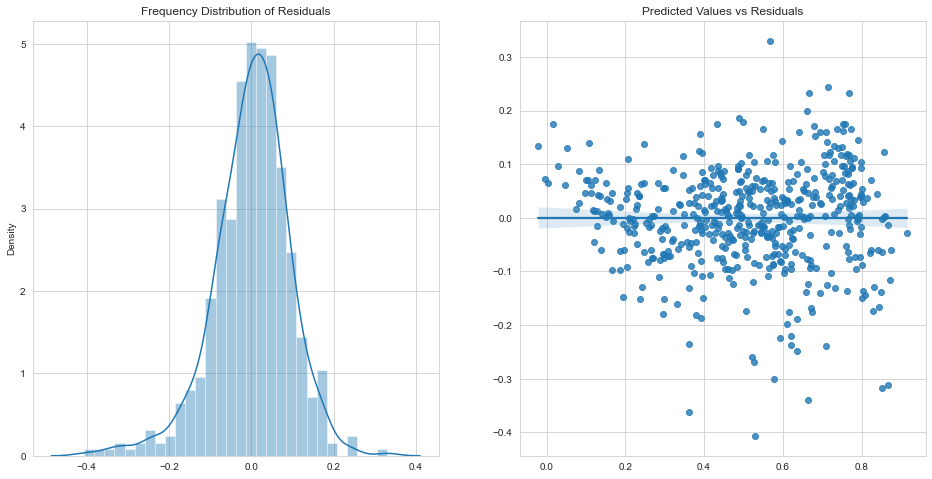

In [66]:
# Residual Analysis of Trained Data

X_train_sm = sm.add_constant(X_train_lr7)

y_train_pred = lr7.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')
\
sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

Residual errors follow a normal distribution with mean=0

Variance of Errors doesnt follow any trends

Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

### Verifying the normality of distribution of residuals Q-Q Plot

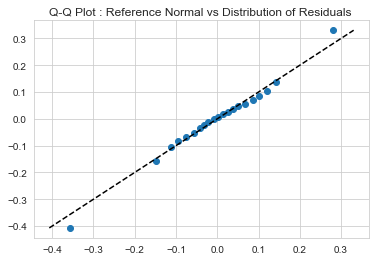

In [67]:
# Verifying the normality of distribution of residuals Q-Q Plot

mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals ')
plt.show()

This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data. Extrapolated points show significant predict inaccuracy.

### Creating lag plot to assess independence of data points

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

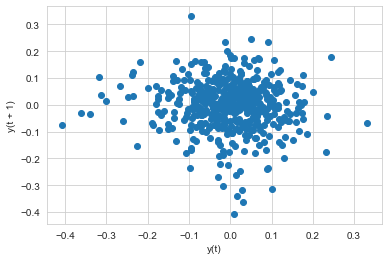

In [68]:
# lag plot to assess independence of data points

from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)

- Lagplot of residuals shows no trend. Hence the error terms have constant variance
- Hence, assumptions of Linear Regression are satisfied by this model

### Making Predictions Using the Final Model on Test Set

In [69]:
## Scaling the test set

df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,...,0,0,0,0,1,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_misty,weathersit_lightsnow_rain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.118182,0.122727,0.159091,0.140909,0.131818,0.172727,0.318182,0.027273
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.323559,0.328872,0.366595,0.348721,0.339064,0.378873,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [71]:
#### Dividing into X_test and y_test

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 

X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions

y_test_pred = lr7.predict(X_test_new)

In [74]:
y_test_pred

184    0.391783
535    0.917258
299    0.406241
221    0.557025
152    0.579506
         ...   
702    0.729245
127    0.523746
640    0.810364
72     0.276449
653    0.721458
Length: 220, dtype: float64

### Step 9: Model Evaluation

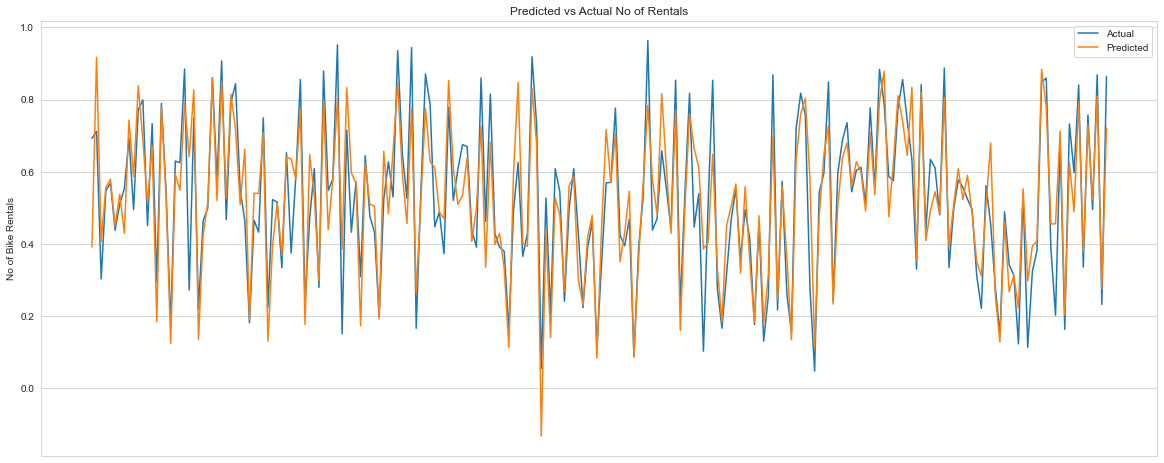

In [75]:
# Plotting Actual vs Predicted No of rentals 

fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of Rentals');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

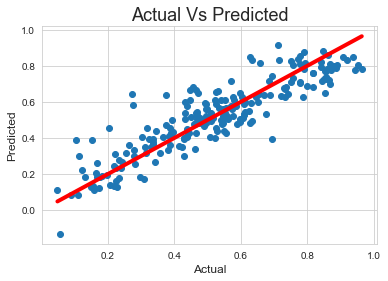

In [76]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=4)
ax.set_title("Actual Vs Predicted",fontsize=18)             # Plot heading 
ax.set_xlabel('Actual',fontsize=12)                         # X-label
ax.set_ylabel('Predicted',fontsize=12)                      # Y-label
plt.show()

#### Predicted vs observed value plots shows that the model is reasonably accurate.

#### MSE and R^2

In [78]:
## Evaluating MSE and R^2

from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_test_pred)

rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)

print('R-squared for train data:',round(rsquared_train,5))
print('R-squared for test data:',round(rsquared_test,5))
print('Mean Squared Error',round(mse,5))

R-squared for train data: 0.83035
R-squared for test data: 0.7942
Mean Squared Error 0.00984


#### Adjusted R square 

In [79]:
## Test data

round(1-(1-r2_score(y_true=y_train,y_pred=y_train_pred))*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),5)

0.82047

In [80]:
## for Train data

round(1-(1-r2_score(y_true=y_test,y_pred=y_test_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),5)

0.76403

### Model Stability

In [81]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected],y_train,cv=10, scoring='r2')
clr

array([0.76905236, 0.80326946, 0.86162963, 0.82811562, 0.82085358,
       0.81523125, 0.76013016, 0.89891084, 0.86354248, 0.83964454])

In [82]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.08)


## Equation of fitted line

### cnt = 0.1259 + 0.232 X  yr + 0.1011 X  mnth_sep + (-0.0783 X weathersit_misty ) + 0.129 X season_winter + (- 0.282 X weathersit_lightsnow_rain) + 0.088080 X season_summer + (- 0.1532 X windspeed) + 0.548 X temp + (-0.0986 X holiday)

## Final Model - lr7

- Vif less than 5
- P value 0.000
- Total Variables 9
- R^2 Train 0.832
- Adjusted R^2 Train 0.827
- R^2 Test 0.794
- Difference bw Train R square and Adjusted r Square 0.005
- difference between Train R Square and Test R Square is 0.361

### Hence we can say we have achived over best model




## Summary 

Analysis is carried out using a Mixed Feature Selection Approach. 
- 15 features are selected algorithmically using Recursive Feature Elimination(RFE).
- Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
- The 9 most significant features to understand demand have been reported.
- The data set is randomly divided into training and test data. 

The final relationship between demand and predictors is as follows.

- cnt = 0.1259 + 0.232 X  yr + 0.1011 X  mnth_sep + (-0.0783 X weathersit_misty ) + 0.129 X season_winter + (- 0.282 X weathersit_lightsnow_rain) + 0.088080 X season_summer + (- 0.1532 X windspeed) + 0.548 X temp + (-0.0986 X holiday)


- Final Model built on training data set explains 83.03% of the variability and achieves 79.41% on test data.

- Top Variables significant in prediction are 
    - yr, mnth_sep, season_winter, season_summer, temp 
    - weathersit_misty,weathersit_lightsnow_rain, windspeed, holiday
    - change in any variable by X unit will change the demand in proportion to the same variable  while all other 8 variables remain constant



- The model has been verified for Multicollinearity effects.
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution for all interpolations. Extraplorations show significant deviation, not affecting Linear Regression applicability.
- Further Lag plot shows there is no auto-correlation in data.